In [1]:
import pickle
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings("ignore")
user_data=pd.read_csv('Dataset/Users.csv',header=[0])
book_data=pd.read_csv('Dataset/Books.csv',header=[0])
ratings_data=pd.read_csv('Dataset/Ratings.csv',header=[0])
#ratings_data=pd.read_csv('Dataset/Users.csv',header=[0])
#book_data.describe()
#book_data.describe()
#ratings_data.describe()

#print(book_data.head)
#DATA CLEANING

book_data.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)
#book_data.head()

In [3]:
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings("ignore")
user_data=pd.read_csv('Dataset/Users.csv',header=[0])
book_data=pd.read_csv('Dataset/Books.csv',header=[0])
ratings_data=pd.read_csv('Dataset/Ratings.csv',header=[0])
#ratings_data=pd.read_csv('Dataset/Users.csv',header=[0])
#book_data.describe()
#book_data.describe()
#ratings_data.describe()

In [18]:
print(len(book_data['Book-Title'].unique()));

242135


In [14]:
print(len(user_data['User-ID'].unique()));
#print(user_data.head());

278858


In [17]:
print(len(ratings_data['Book-Rating']>0));
#print(ratings_data.head());

1149780


In [4]:
#print(book_data.head)
#DATA CLEANING

book_data.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)
#book_data.head()

In [5]:
book_data.isnull().sum() 

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [6]:
book_data.loc[book_data['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [7]:
book_data.loc[book_data['Publisher'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [8]:
book_data.at[187689 ,'Book-Author'] = 'Other'
book_data.at[128890 ,'Publisher'] = 'Other'
book_data.at[129037 ,'Publisher'] = 'Other'

In [9]:
book_data['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [10]:
#pd.set_option('display.max_colwidth', -1)
book_data.loc[book_data['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [11]:
book_data.loc[book_data['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [12]:
book_data.at[209538 ,'Publisher'] = 'DK Publishing Inc'
book_data.at[209538 ,'Year-Of-Publication'] = 2000
book_data.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
book_data.at[209538 ,'Book-Author'] = 'Michael Teitelbaum'

book_data.at[221678 ,'Publisher'] = 'DK Publishing Inc'
book_data.at[221678 ,'Year-Of-Publication'] = 2000
book_data.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
book_data.at[209538 ,'Book-Author'] = 'James Buckley'

book_data.at[220731 ,'Publisher'] = 'Gallimard'
book_data.at[220731 ,'Year-Of-Publication'] = '2003'
book_data.at[209538 ,'Book-Title'] = 'Peuple du ciel - Suivi de Les bergers '
book_data.at[209538 ,'Book-Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'

In [13]:
book_data['Year-Of-Publication'] = book_data['Year-Of-Publication'].astype(int)

In [14]:
book_data.loc[book_data['Year-Of-Publication'] > 2021, 'Year-Of-Publication'] = 2002
book_data.loc[book_data['Year-Of-Publication'] == 0, 'Year-Of-Publication'] = 2002

In [15]:
book_data['ISBN'] = book_data['ISBN'].str.upper()

In [16]:
book_data.drop_duplicates(keep='last', inplace=True) 
book_data.reset_index(drop = True, inplace = True)

In [17]:
#userdataset_preprocessing
users=pd.read_csv('Dataset/Users.csv',header=[0])

In [18]:
## Checking null values
print(users.isna().sum())

User-ID          0
Location         0
Age         110762
dtype: int64


In [19]:
users.drop(['Location'], axis=1, inplace=True)
#print(users.info())

In [20]:
users.drop_duplicates(keep='last', inplace=True)
users.reset_index(drop=True, inplace=True)
#print(users.info())

In [21]:
#Ratings dataset cleaning

ratings=pd.read_csv('Dataset/Ratings.csv',header=[0])

In [22]:
print("Columns: ", list(ratings.columns))
#ratings.info()

Columns:  ['User-ID', 'ISBN', 'Book-Rating']


In [23]:
ratings.isnull().sum() 

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [24]:
ratings['ISBN'] = ratings['ISBN'].str.upper()

In [25]:
ratings.drop_duplicates(keep='last', inplace=True)
ratings.reset_index(drop=True, inplace=True)

In [26]:
#MERGING DATASETS
dataset = pd.merge(book_data, ratings, on='ISBN', how='inner')
dataset = pd.merge(dataset, users, on='User-ID', how='inner')
#dataset.info()
#dataset.head()

In [27]:
dataset1 = dataset[dataset['Book-Rating'] != 0]
dataset1 = dataset1.reset_index(drop = True)
#dataset1.info()

In [28]:
dataset2 = dataset[dataset['Book-Rating'] == 0]
dataset2 = dataset2.reset_index(drop = True)
#dataset2.shape

In [39]:
#WEIGHTED AVERAGE

df1 = pd.DataFrame(dataset1['Book-Title'].value_counts())
df1['Total-Ratings'] = df1['Book-Title']
df1['Book-Title'] = df1.index
df1.reset_index(level=0, inplace=True)
df1 = df1.drop('index',axis=1)
df1 = pd.read_pickle('weightedData')

## C - Mean vote across the whole
C = df1['Average Rating'].mean()

## Minimum number of ratings required to be in the chart
m = df1['Total-Ratings'].quantile(0.90)

def weighted_rating(x, m=m, C=C): 
    v = x['Total-Ratings']    #v - number of votes
    R = x['Average Rating']   #R - Average Rating   
    return (v/(v+m) * R) + (m/(m+v) * C)

df1 = df1.loc[df1['Total-Ratings'] >= m]

df1['score'] = df1.apply(weighted_rating, axis=1)
df1 = df1.sort_values('score', ascending=False)

print("Recommended Books:-\n")
df1.head(5)

Recommended Books:-



,Book-Title,Total-Ratings,Average Rating,score
4794,Postmarked Yesteryear: 30 Rare Holiday Postcards,11,10,9.189906
7272,The Sneetches and Other Stories,8,10,9.002961
17,Harry Potter and the Prisoner of Azkaban (Book 3),277,9,8.971768
28,Harry Potter and the Goblet of Fire (Book 4),247,9,8.968407
42,Harry Potter and the Order of the Phoenix (Boo...,211,9,8.963141


In [29]:
df.loc[df['Book-Title'] == "The Lovely Bones: A Novel",:]

NameError: name 'df' is not defined

In [56]:
df.loc[df['Book-Title'] == "Lucky : A Memoir",:]

,Book-Title,Total-Ratings,Average Rating,score
122,Lucky : A Memoir,133,8,7.97854


In [57]:
df.loc[df['Book-Title'] == "Where the Heart Is (Oprah's Book Club (Paperback))",:]

,Book-Title,Total-Ratings,Average Rating,score
14,Where the Heart Is (Oprah's Book Club (Paperba...,295,8,7.990128


In [58]:
df.loc[df['Book-Title'] == "The Da Vinci Code",:]

,Book-Title,Total-Ratings,Average Rating,score
2,The Da Vinci Code,495,8,7.994077


In [59]:
df.loc[df['Book-Title'] == "Good in Bed",:]

,Book-Title,Total-Ratings,Average Rating,score
27,Good in Bed,247,8,7.988248


In [60]:
df.loc[df['Book-Title'] == "The Da Vinci Code",:]

,Book-Title,Total-Ratings,Average Rating,score
2,The Da Vinci Code,495,8,7.994077


In [61]:
df.loc[df['Book-Title'] == "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",:]

,Book-Title,Total-Ratings,Average Rating,score
11,Harry Potter and the Sorcerer's Stone (Harry P...,315,8,7.990745


In [62]:
df.loc[df['Book-Title'] == "The Red Tent (Bestselling Backlist)",:]

,Book-Title,Total-Ratings,Average Rating,score
5,The Red Tent (Bestselling Backlist),383,8,7.992367


In [63]:
df.loc[df['Book-Title'] == "The Secret Life of Bees",:]

,Book-Title,Total-Ratings,Average Rating,score
3,The Secret Life of Bees,413,8,7.992915


In [64]:
df.loc[df['Book-Title'] == "Divine Secrets of the Ya-Ya Sisterhood: A Novel",:]

,Book-Title,Total-Ratings,Average Rating,score
10,Divine Secrets of the Ya-Ya Sisterhood: A Novel,323,7,7.006215


In [30]:

book_data.loc[book_data['Book-Title'] == df['Book-Title'][2],:]

NameError: name 'df' is not defined

In [30]:
#Book By Same Author and Same Publisher of given book

def printBook(k, n):
    z = k['Book-Title'].unique()
    for x in range(len(z)):
        print(z[x])
        if x >= n-1:
            break
def get_books(dataframe, name, n):
    print("\nBooks by same Author:\n")
    d = dataframe[dataframe['Book-Title'] == bookName]
    #print(d)
    au = d['Book-Author'].unique()
    print(au)
    data = dataset1[dataset1['Book-Title'] != name]

    if au[0] in list(data['Book-Author'].unique()):
        k2 = data[data['Book-Author'] == au[0]]
    k2 = k2.sort_values(by=['Book-Rating'])
    printBook(k2, n)

    print("\n\nBooks by same Publisher:\n")
    au = d['Publisher'].unique()
    print(au)
    if au[0] in list(data['Publisher'].unique()):
        k2 = pd.DataFrame(data[data['Publisher'] == au[0]])
    k2=k2.sort_values(by=['Book-Rating']) 
    printBook(k2, n)
bookName=input("Enter book name") # Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
number=int(input("Enter number of books to be recommended"))

if bookName in list(dataset1['Book-Title'].unique()):
    get_books(dataset1, bookName, number)
else:
    print("Invalid Book Name!!")

Enter book nameHarry Potter and the Goblet of Fire (Book 4)
Enter number of books to be recommended5

Books by same Author:

['J. K. Rowling']
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Order of the Phoenix (Book 5)
Harry Potter y el cÃ¡liz de fuego
Harry Potter and the Chamber of Secrets (Book 2)
Fantastic Beasts and Where to Find Them


Books by same Publisher:

['Scholastic' 'Scholastic Paperbacks']
Let's Get Invisible! (Goosebumps, No 6)
Fraidy Cats (Hello Reader, Level 2)
Call Waiting
I Choose You (Pokemon Chapter Book #1)
Through the Hidden Door


In [46]:
#Collaborative 


#claculates total-ratings each book got and creates a new dataframe having columns bt,isbn,ba,ui,br,tr
df = pd.DataFrame(dataset1['Book-Title'].value_counts())
df['Total-Ratings'] = df['Book-Title']
df['Book-Title'] = df.index
df.reset_index(level=0, inplace=True)
df = df.drop('index',axis=1)
df = dataset1.merge(df, left_on = 'Book-Title', right_on = 'Book-Title', how = 'left')
df = df.drop(['Year-Of-Publication','Publisher','Age'], axis=1)
#print(df.head(10))
popularity_threshold = 80
popular_book = df[df['Total-Ratings'] >= popularity_threshold]
popular_book = popular_book.reset_index(drop = True)

testdf = pd.DataFrame()
testdf['ISBN'] = popular_book['ISBN']
testdf['Book-Rating'] = popular_book['Book-Rating']
testdf['User-ID'] = popular_book['User-ID']
testdf = testdf[['User-ID','Book-Rating']].groupby(testdf['ISBN'])
#print(testdf.groups) #have the data of users who rated each individual book
#print(dataset1.info())

listOfDictonaries=[]
indexMap = {}
reverseIndexMap = {}
ptr=0

for groupKey in testdf.groups.keys():
    tempDict={}
    groupDF = testdf.get_group(groupKey)
    groupDF= groupDF.reset_index(drop = True)
    for i in range(0,len(groupDF)):
        tempDict[groupDF.iloc[i,0]] = groupDF.iloc[i,1] #[i,0]=user-id [i,1]=rating
    #in tempdict key=userid value=rating
    indexMap[ptr]=groupKey #indexMap has isbn values
    reverseIndexMap[groupKey] = ptr
    ptr=ptr+1
    listOfDictonaries.append(tempDict) 

dictVectorizer = DictVectorizer(sparse=True)
vector = dictVectorizer.fit_transform(listOfDictonaries)
#print(vector)
#pairwiseSimilarity = cosine_similarity(vector)
pairwiseSimilarity = cosine_similarity(vector)

def printBookDetails(bookID):
    print(dataset1[dataset1['ISBN']==bookID]['Book-Title'].values[0])
    

def getTopRecommandations(bookID):
    collaborative = []
    row = reverseIndexMap[bookID]
    print("Input Book:")
    printBookDetails(bookID)
    
    print("\nRECOMMENDATIONS:\n")
    
    mn = 0
    similar = []
    for i in np.argsort(pairwiseSimilarity[row])[::-1]:
          if dataset1[dataset1['ISBN']==indexMap[i]]['Book-Title'].values[0] not in similar:
               
                if mn>=5:
                      break
                mn+=1
                similar.append(dataset1[dataset1['ISBN']==indexMap[i]]['Book-Title'].values[0])
                printBookDetails(indexMap[i])
                collaborative.append(dataset1[dataset1['ISBN']==indexMap[i]]['Book-Title'].values[0])
                #collaborative.append(pairwiseSimilarity[i][np.argsort(pairwiseSimilarity[i])[::-1][0]])
            
    return collaborative

k = list(dataset1['Book-Title'])
m = list(dataset1['ISBN'])

collaborative = getTopRecommandations(m[k.index(bookName)])
#print(collaborative)

Input Book:
Harry Potter and the Goblet of Fire (Book 4)

RECOMMENDATIONS:

Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Order of the Phoenix (Book 5)


In [47]:
print(vector)

  (0, 789)	9.0
  (0, 1625)	9.0
  (1, 1625)	8.0
  (2, 887)	9.0
  (2, 4003)	9.0
  (2, 17367)	9.0
  (3, 2)	8.0
  (3, 1383)	8.0
  (3, 2038)	9.0
  (3, 2434)	9.0
  (3, 2622)	10.0
  (3, 7747)	10.0
  (3, 7958)	8.0
  (3, 9485)	9.0
  (3, 10260)	8.0
  (3, 10525)	8.0
  (3, 10708)	8.0
  (3, 10776)	10.0
  (3, 11786)	8.0
  (3, 11873)	6.0
  (3, 11911)	8.0
  (3, 12413)	8.0
  (3, 13048)	9.0
  (3, 13540)	10.0
  (3, 15316)	6.0
  :	:
  (978, 18726)	7.0
  (979, 18613)	10.0
  (979, 19282)	10.0
  (980, 3288)	8.0
  (980, 10487)	6.0
  (980, 11285)	5.0
  (980, 18438)	7.0
  (981, 11285)	9.0
  (982, 8412)	8.0
  (982, 11649)	10.0
  (983, 2778)	9.0
  (984, 3670)	6.0
  (985, 5593)	8.0
  (986, 9188)	7.0
  (987, 11332)	9.0
  (988, 5686)	10.0
  (988, 8491)	9.0
  (988, 10064)	7.0
  (989, 5719)	1.0
  (990, 7336)	7.0
  (990, 11742)	8.0
  (991, 7859)	10.0
  (992, 17002)	9.0
  (993, 4194)	7.0
  (994, 15566)	7.0


In [33]:
df1.loc[df1['Book-Title'] == "Harry Potter and the Goblet of Fire (Book 4)",:]

,Book-Title,Total-Ratings,Average Rating,score
28,Harry Potter and the Goblet of Fire (Book 4),247,9,8.968407


In [34]:
df1.loc[df1['Book-Title'] == "Harry Potter and the Prisoner of Azkaban (Book 3)",:]

,Book-Title,Total-Ratings,Average Rating,score
17,Harry Potter and the Prisoner of Azkaban (Book 3),277,9,8.971768


In [35]:
df1.loc[df1['Book-Title'] == "Harry Potter and the Chamber of Secrets (Book 2)",:]

,Book-Title,Total-Ratings,Average Rating,score
9,Harry Potter and the Chamber of Secrets (Book 2),326,8,7.991053


In [36]:
df1.loc[df1['Book-Title'] == "Harry Potter and the Sorcerer's Stone (Book 1)",:]

,Book-Title,Total-Ratings,Average Rating,score
68,Harry Potter and the Sorcerer's Stone (Book 1),176,9,8.956014


In [37]:
df1.loc[df1['Book-Title'] == "Harry Potter and the Order of the Phoenix (Book 5)",:]

,Book-Title,Total-Ratings,Average Rating,score
42,Harry Potter and the Order of the Phoenix (Boo...,211,9,8.963141


In [35]:
df1.head(5)

,Book-Title,Total-Ratings,Average Rating,score
4794,Postmarked Yesteryear: 30 Rare Holiday Postcards,11,10,9.189906
7272,The Sneetches and Other Stories,8,10,9.002961
17,Harry Potter and the Prisoner of Azkaban (Book 3),277,9,8.971768
28,Harry Potter and the Goblet of Fire (Book 4),247,9,8.968407
42,Harry Potter and the Order of the Phoenix (Boo...,211,9,8.963141


In [101]:
df1.loc[df1['Book-Title'] == "Quentins",:]

,Book-Title,Total-Ratings,Average Rating,score
309,Quentins,80,7,7.023982


In [102]:
df1.loc[df1['Book-Title'] == "Unnatural Exposure",:]

,Book-Title,Total-Ratings,Average Rating,score
172,Unnatural Exposure,106,7,7.018365


In [103]:
df1.loc[df1['Book-Title'] == "Hornet's Nest",:]

,Book-Title,Total-Ratings,Average Rating,score
238,Hornet's Nest,93,6,6.071821


In [104]:
df1.loc[df1['Book-Title'] == "Back Roads",:]

,Book-Title,Total-Ratings,Average Rating,score
190,Back Roads,102,7,7.019051


In [105]:
df1.loc[df1['Book-Title'] == "Pretend You Don't See Her",:]

,Book-Title,Total-Ratings,Average Rating,score
305,Pretend You Don't See Her,80,8,7.965159


In [106]:
df1.loc[df1['Book-Title'] == "Good in Bed",:]

,Book-Title,Total-Ratings,Average Rating,score
27,Good in Bed,247,8,7.988248


In [107]:
df1.loc[df1['Book-Title'] == "When the Wind Blows",:]

,Book-Title,Total-Ratings,Average Rating,score
99,When the Wind Blows,144,7,7.013681


In [108]:
df1.loc[df1['Book-Title'] == "Deception Point",:]

,Book-Title,Total-Ratings,Average Rating,score
199,Deception Point,100,7,7.019414


In [109]:
df1.loc[df1['Book-Title'] == "2nd Chance",:]

,Book-Title,Total-Ratings,Average Rating,score
90,2nd Chance,150,7,7.013152


In [110]:
df1.loc[df1['Book-Title'] == "Whispers",:]

,Book-Title,Total-Ratings,Average Rating,score
273,Whispers,86,7,7.022401


In [111]:
df1.loc[df1['Book-Title'] == "Along Came a Spider (Alex Cross Novels)",:]

,Book-Title,Total-Ratings,Average Rating,score
151,Along Came a Spider (Alex Cross Novels),118,8,7.975923


In [112]:
df1.loc[df1['Book-Title'] == "The Bad Beginning (A Series of Unfortunate Events, Book 1)",:]

,Book-Title,Total-Ratings,Average Rating,score
143,The Bad Beginning (A Series of Unfortunate Eve...,121,7,7.016179


In [113]:
df1.loc[df1['Book-Title'] == "Cradle and All",:]

,Book-Title,Total-Ratings,Average Rating,score
156,Cradle and All,115,7,7.016987


In [114]:
df1.loc[df1['Book-Title'] == "Violets Are Blue",:]

,Book-Title,Total-Ratings,Average Rating,score
93,Violets Are Blue,148,7,7.013324


In [115]:
df1.loc[df1['Book-Title'] == "Chosen Prey",:]

,Book-Title,Total-Ratings,Average Rating,score
306,Chosen Prey,80,7,7.023982


In [116]:
df1.loc[df1['Book-Title'] == "Siddhartha",:]

,Book-Title,Total-Ratings,Average Rating,score
241,Siddhartha,92,8,7.969469


In [117]:
df1.loc[df1['Book-Title'] == "To Kill a Mockingbird",:]

,Book-Title,Total-Ratings,Average Rating,score
20,To Kill a Mockingbird,267,8,7.989112


In [118]:
df1.loc[df1['Book-Title'] == "Flesh and Blood",:]

,Book-Title,Total-Ratings,Average Rating,score
226,Flesh and Blood,96,7,7.020183


In [119]:
df1.loc[df1['Book-Title'] == "The Talisman",:]

,Book-Title,Total-Ratings,Average Rating,score
201,The Talisman,99,8,7.971524


In [120]:
df1.loc[df1['Book-Title'] == "Cause of Death",:]

,Book-Title,Total-Ratings,Average Rating,score
193,Cause of Death,100,7,7.019414


In [121]:
df1.loc[df1['Book-Title'] == "1st to Die: A Novel",:]

,Book-Title,Total-Ratings,Average Rating,score
31,1st to Die: A Novel,236,7,7.008458


In [122]:
df1.loc[df1['Book-Title'] == "Three Fates",:]

,Book-Title,Total-Ratings,Average Rating,score
280,Three Fates,85,8,7.967094


In [123]:
df1.loc[df1['Book-Title'] == "The Rainmaker",:]

,Book-Title,Total-Ratings,Average Rating,score
53,The Rainmaker,194,7,7.010244


In [124]:
df1.loc[df1['Book-Title'] == "Kiss the Girls",:]

,Book-Title,Total-Ratings,Average Rating,score
239,Kiss the Girls,93,7,7.020801


In [38]:
#Collaborative 
from sklearn.metrics.pairwise import euclidean_distances

#claculates total-ratings each book got and creates a new dataframe having columns bt,isbn,ba,ui,br,tr
df = pd.DataFrame(dataset1['Book-Title'].value_counts())
df['Total-Ratings'] = df['Book-Title']
df['Book-Title'] = df.index
df.reset_index(level=0, inplace=True)
df = df.drop('index',axis=1)
df = dataset1.merge(df, left_on = 'Book-Title', right_on = 'Book-Title', how = 'left')
df = df.drop(['Year-Of-Publication','Publisher','Age'], axis=1)
#print(df.head(10))
popularity_threshold = 80
popular_book = df[df['Total-Ratings'] >= popularity_threshold]
popular_book = popular_book.reset_index(drop = True)

testdf = pd.DataFrame()
testdf['ISBN'] = popular_book['ISBN']
testdf['Book-Rating'] = popular_book['Book-Rating']
testdf['User-ID'] = popular_book['User-ID']
testdf = testdf[['User-ID','Book-Rating']].groupby(testdf['ISBN'])
#print(testdf.groups) #have the data of users who rated each individual book
#print(dataset1.info())

listOfDictonaries=[]
indexMap = {}
reverseIndexMap = {}
ptr=0

for groupKey in testdf.groups.keys():
    tempDict={}
    groupDF = testdf.get_group(groupKey)
    groupDF= groupDF.reset_index(drop = True)
    for i in range(0,len(groupDF)):
        tempDict[groupDF.iloc[i,0]] = groupDF.iloc[i,1] #[i,0]=user-id [i,1]=rating
    #in tempdict key=userid value=rating
    indexMap[ptr]=groupKey #indexMap has isbn values
    reverseIndexMap[groupKey] = ptr
    ptr=ptr+1
    listOfDictonaries.append(tempDict) 

dictVectorizer = DictVectorizer(sparse=True)
vector = dictVectorizer.fit_transform(listOfDictonaries)
#print(vector)
#pairwiseSimilarity = cosine_similarity(vector)
pairwiseSimilarity = euclidean_distances(vector)

def printBookDetails(bookID):
    print(dataset1[dataset1['ISBN']==bookID]['Book-Title'].values[0])
    

def getTopRecommandations(bookID):
    collaborative = []
    row = reverseIndexMap[bookID]
    print("Input Book:")
    printBookDetails(bookID)
    
    print("\nRECOMMENDATIONS:\n")
    
    mn = 0
    similar = []
    for i in np.argsort(pairwiseSimilarity[row])[::-1]:
          if dataset1[dataset1['ISBN']==indexMap[i]]['Book-Title'].values[0] not in similar:
               
                if mn>=5:
                      break
                mn+=1
                similar.append(dataset1[dataset1['ISBN']==indexMap[i]]['Book-Title'].values[0])
                printBookDetails(indexMap[i])
                collaborative.append(dataset1[dataset1['ISBN']==indexMap[i]]['Book-Title'].values[0])
                #collaborative.append(pairwiseSimilarity[i][np.argsort(pairwiseSimilarity[i])[::-1][0]])
            
    return collaborative

k = list(dataset1['Book-Title'])
m = list(dataset1['ISBN'])

collaborative1 = getTopRecommandations(m[k.index(bookName)])
#print(collaborative1)

Input Book:
Harry Potter and the Goblet of Fire (Book 4)

RECOMMENDATIONS:

The Lovely Bones: A Novel
The Da Vinci Code
The Red Tent (Bestselling Backlist)
The Secret Life of Bees
Divine Secrets of the Ya-Ya Sisterhood: A Novel


In [39]:
print(collaborative1)

['The Lovely Bones: A Novel', 'The Da Vinci Code', 'The Red Tent (Bestselling Backlist)', 'The Secret Life of Bees', 'Divine Secrets of the Ya-Ya Sisterhood: A Novel']


In [40]:
l=collaborative+collaborative1
print(l)

["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))", 'Harry Potter and the Chamber of Secrets (Book 2)', 'Harry Potter and the Prisoner of Azkaban (Book 3)', 'Harry Potter and the Goblet of Fire (Book 4)', 'Harry Potter and the Order of the Phoenix (Book 5)', 'The Lovely Bones: A Novel', 'The Da Vinci Code', 'The Red Tent (Bestselling Backlist)', 'The Secret Life of Bees', 'Divine Secrets of the Ya-Ya Sisterhood: A Novel']


In [44]:
print(df1.shape)

(13744, 4)


In [ ]:
df1['Book-Title']

In [63]:
l=[]
for i in range(len(collaborative)):
    #if df1['Book-Title'] == collaborative[i]:
        l.append(df1.loc[df1['Book-Title'] == collaborative[i],:]['score'])
print(l[0])   

11    7.990745
Name: score, dtype: float64


In [40]:
df1.loc[df1['Book-Title'] == "The Lovely Bones: A Novel",:]

,Book-Title,Total-Ratings,Average Rating,score
0,The Lovely Bones: A Novel,707,8,7.995841


In [41]:
df1.loc[df1['Book-Title'] == "The Da Vinci Code",:]

,Book-Title,Total-Ratings,Average Rating,score
2,The Da Vinci Code,495,8,7.994077


In [42]:
df1.loc[df1['Book-Title'] == "The Red Tent (Bestselling Backlist)",:]

,Book-Title,Total-Ratings,Average Rating,score
5,The Red Tent (Bestselling Backlist),383,8,7.992367


In [43]:
df1.loc[df1['Book-Title'] == "The Secret Life of Bees",:]

,Book-Title,Total-Ratings,Average Rating,score
3,The Secret Life of Bees,413,8,7.992915


In [44]:
df1.loc[df1['Book-Title'] == "Divine Secrets of the Ya-Ya Sisterhood: A Novel",:]

,Book-Title,Total-Ratings,Average Rating,score
10,Divine Secrets of the Ya-Ya Sisterhood: A Novel,323,7,7.006215


In [36]:
df1.loc[df1['Book-Title'] == "Divine Secrets of the Ya-Ya Sisterhood: A Novel",:]

,Book-Title,Total-Ratings,Average Rating,score
10,Divine Secrets of the Ya-Ya Sisterhood: A Novel,323,7,7.006215


In [37]:
df1.loc[df1['Book-Title'] == "Where the Heart Is (Oprah's Book Club (Paperback))",:]

,Book-Title,Total-Ratings,Average Rating,score
14,Where the Heart Is (Oprah's Book Club (Paperba...,295,8,7.990128


In [39]:
df1.loc[df1['Book-Title'] == "Angels &amp; Demons",:]

,Book-Title,Total-Ratings,Average Rating,score
12,Angels &amp; Demons,310,8,7.990598


In [40]:
df1.loc[df1['Book-Title'] == "Girl with a Pearl Earring",:]

,Book-Title,Total-Ratings,Average Rating,score
16,Girl with a Pearl Earring,278,7,7.007203


In [41]:
df1.loc[df1['Book-Title'] == "To Kill a Mockingbird",:]

,Book-Title,Total-Ratings,Average Rating,score
20,To Kill a Mockingbird,267,8,7.989112


In [42]:
df1.loc[df1['Book-Title'] == "Harry Potter and the Order of the Phoenix (Book 5)",:]

,Book-Title,Total-Ratings,Average Rating,score
42,Harry Potter and the Order of the Phoenix (Boo...,211,9,8.963141


In [43]:
df1.loc[df1['Book-Title'] == "Snow Falling on Cedars",:]

,Book-Title,Total-Ratings,Average Rating,score
18,Snow Falling on Cedars,275,7,7.00728


In [44]:
df1.loc[df1['Book-Title'] == "A Painted House",:]

,Book-Title,Total-Ratings,Average Rating,score
7,A Painted House,366,7,7.005495


In [45]:
df1.loc[df1['Book-Title'] == "The Pilot's Wife : A Novel",:]

,Book-Title,Total-Ratings,Average Rating,score
19,The Pilot's Wife : A Novel,272,7,7.007359


In [46]:
df1.loc[df1['Book-Title'] == "The Five People You Meet in Heaven",:]

,Book-Title,Total-Ratings,Average Rating,score
29,The Five People You Meet in Heaven,244,8,7.988106


In [47]:
df1.loc[df1['Book-Title'] == "The Catcher in the Rye",:]

,Book-Title,Total-Ratings,Average Rating,score
21,The Catcher in the Rye,265,7,7.00755


In [48]:
df1.loc[df1['Book-Title'] == "Life of Pi",:]

,Book-Title,Total-Ratings,Average Rating,score
8,Life of Pi,337,8,7.991341


In [49]:
df1.loc[df1['Book-Title'] == "The Poisonwood Bible: A Novel",:]

,Book-Title,Total-Ratings,Average Rating,score
35,The Poisonwood Bible: A Novel,219,8,7.986779


In [50]:
df1.loc[df1['Book-Title'] == "Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",:]

,Book-Title,Total-Ratings,Average Rating,score
26,"Tuesdays with Morrie: An Old Man, a Young Man,...",250,8,7.988386


In [51]:
df1.loc[df1['Book-Title'] == "Good in Bed",:]

,Book-Title,Total-Ratings,Average Rating,score
27,Good in Bed,247,8,7.988248


In [52]:
df1.loc[df1['Book-Title'] == "Harry Potter and the Chamber of Secrets (Book 2)",:]

,Book-Title,Total-Ratings,Average Rating,score
9,Harry Potter and the Chamber of Secrets (Book 2),326,8,7.991053


In [53]:
df1.loc[df1['Book-Title'] == "Wild Animus",:]

,Book-Title,Total-Ratings,Average Rating,score
1,Wild Animus,581,4,4.029076


In [54]:
df1.loc[df1['Book-Title'] == "Interview with the Vampire",:]

,Book-Title,Total-Ratings,Average Rating,score
32,Interview with the Vampire,232,7,7.008601


In [55]:
df1.loc[df1['Book-Title'] == "A Prayer for Owen Meany",:]

,Book-Title,Total-Ratings,Average Rating,score
63,A Prayer for Owen Meany,182,8,7.984163


In [56]:
df1.loc[df1['Book-Title'] == "She's Come Undone (Oprah's Book Club)",:]

,Book-Title,Total-Ratings,Average Rating,score
37,She's Come Undone (Oprah's Book Club),217,7,7.009182


In [34]:
dataset.rename(columns = {'User-ID':'UserID'}, inplace = True)

In [35]:
dataset.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,UserID,Book-Rating,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0,18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,NaN
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0,NaN
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0,NaN
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8,0,NaN


In [55]:
from sklearn import model_selection
train_data, test_data = model_selection.train_test_split(dataset, test_size=0.20)

In [56]:
print(f'Training set lengths: {len(train_data)}')
print(f'Testing set lengths: {len(test_data)}')
print(f'Test set is {(len(test_data)/(len(train_data)+len(test_data))*100):.0f}% of the full dataset.')

Training set lengths: 825018
Testing set lengths: 206255
Test set is 20% of the full dataset.


In [57]:
train_data.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,UserID,Book-Rating,Age
196264,8420641227,MisiÃ³n de la universidad y otros ensayos sobr...,JosÃ© Ortega y Gasset,1982,Revista de Occidente en Alianza Editorial,229501,6,20.0
808738,0140376577,The Doom of the Haunted Opera (John Bellairs),John Bellairs,1998,Puffin Books,92398,5,NaN
559466,0140086447,Winter in the Blood (Contemporary American Fic...,James Welch,1992,Penguin Books,101731,8,NaN
88291,0373711840,A Cowboy At Heart (Harlequin Superromance),Roz Denny Fox,2004,Harlequin,131046,5,26.0
717830,0452264871,Flashman and the Redskins,George MacDonald Fraser,1983,Plume Books,160881,9,NaN


In [58]:
# Get int mapping for user_id in train dataset

u_unique_train = train_data.UserID.unique()  
train_data_user2idx = {o:i for i, o in enumerate(u_unique_train)}

# Get int mapping for isbn in train dataset

i_unique_train = train_data.ISBN.unique()  
train_data_book2idx = {o:i for i, o in enumerate(i_unique_train)}

# Get int mapping for user_id in test dataset

u_unique_test = test_data.UserID.unique()  
test_data_user2idx = {o:i for i, o in enumerate(u_unique_test)}

# Get int mapping for isbn in train dataset

i_unique_test = test_data.ISBN.unique() 
test_data_book2idx = {o:i for i, o in enumerate(i_unique_test)}

In [59]:
train_data.head(5)
test_data.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,UserID,Book-Rating,Age
234955,0446353205,The Charm School,Nelson DeMille,1989,Warner Books,55734,0,37.0
348144,0312315260,I Sleep at Red Lights: A True Story of Life Af...,Bruce Stockler,2003,St. Martin's Press,225763,0,NaN
164479,0802448232,The Timber Wolf (Sugar Creek Gang),Paul Hutchins,1965,Moody Pr,136205,0,39.0
363984,0671014951,Briar Rose,Kimberly Cates,1999,Pocket,246470,0,31.0
712017,0312855044,Better in the Dark,Chelsea Quinn Yarbro,1993,St Martins Pr,248718,5,43.0


In [60]:
# TRAINING SET
train_data['u_unique'] = train_data['UserID'].map(train_data_user2idx)
train_data['i_unique'] = train_data['ISBN'].map(train_data_book2idx)

# TESTING SET
test_data['u_unique'] = test_data['UserID'].map(test_data_user2idx)
test_data['i_unique'] = test_data['ISBN'].map(test_data_book2idx)

# Convert back to 3-column df
train_data = train_data[['u_unique', 'i_unique', 'Book-Rating']]
test_data = test_data[['u_unique', 'i_unique', 'Book-Rating']]

In [61]:
train_data.sample(5)

,u_unique,i_unique,Book-Rating
687654,1507,20737,0
488316,5357,316,5
354134,9224,47704,4
968819,17318,154869,8
110708,140,103520,0


In [80]:
n_users = train_data['u_unique'].nunique()
n_books = train_data['i_unique'].nunique()

train_matrix = np.zeros((n_users, n_books))

for entry in train_data.itertuples():                  # entry[1] is the user-id, entry[2] is the book-isbn
    train_matrix[entry[1]-1, entry[2]-1] = entry[3]    # -1 is to counter 0-based indexing

MemoryError: Unable to allocate 145. GiB for an array with shape (81399, 238488) and data type float64

In [79]:
n_users = test_data['u_unique'].nunique()
n_books = test_data['i_unique'].nunique()

test_matrix = np.zeros((n_users, n_books))

for entry in test_data.itertuples():
    test_matrix[entry[1]-1, entry[2]-1] = entry[3] 

In [65]:
train_matrix_small = train_matrix[:5000, :5000]
test_matrix_small = test_matrix[:5000, :5000]

from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_matrix_small, metric='cosine')
item_similarity = pairwise_distances(train_matrix_small.T, metric='cosine') 

In [52]:
def predict_books(ratings, similarity, type='user'): # default type is 'user'
    if type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [53]:
item_prediction = predict_books(train_matrix_small, item_similarity, type='item')
user_prediction = predict_books(train_matrix_small, user_similarity, type='user')

In [54]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(prediction, test_matrix):
    prediction = prediction[test_matrix.nonzero()].flatten()
    test_matrix = test_matrix[test_matrix.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, test_matrix))

print(f'Item-based CF RMSE: {rmse(item_prediction, test_matrix_small)}')
print(f'User-based CF RMSE: {rmse(user_prediction, test_matrix_small)}')

Item-based CF RMSE: 7.972747325138345
User-based CF RMSE: 7.971576685166739


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots() 
ax.plot([5,10,15,20,25], [8.5,8.368,7.72,7.73,7.54]); 
ax.plot([5,10,15,20,25], [7.9,7.69,7.6553,7.299,7.2424]); 
ax.set_xlabel('Size of recommended books with different input');
ax.set_ylabel('Weighted-Average of ratings');
ax.legend();

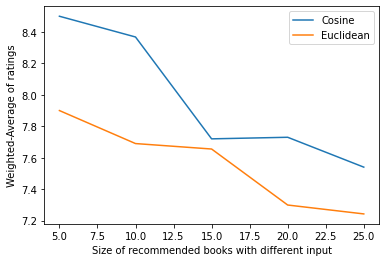

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots() 
ax.plot([5,10,15,20,25], [8.5,8.368,7.72,7.73,7.54],label='Cosine'); 
ax.plot([5,10,15,20,25], [7.9,7.69,7.6553,7.299,7.2424],label='Euclidean'); 
ax.set_xlabel('Size of recommended books with different input');
ax.set_ylabel('Weighted-Average of ratings');
ax.legend();

In [ ]:
from sklearn import model_selection
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics.pairwise import pairwise_distances

import pickle
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
